## Homework 01: due 22:00, Friday, September 30, 2022

### -	Please work on this Jupyter notebook directly.
### -	Name a folder using your student id and Assignment number (e.g., b88501045-HW1), put all the python scripts and notebook files into the folder and zip the folder (e.g., b88501045-HW1.zip).
### - Submit the homework directly through the NTU COOL course website.


### You will work with the attached CSV data file _Rain_MD-Androy-Bekily_1d_19810101-20211231_CHIRPS.csv_, and your specific tasks are:

#### 0. import essential modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### 1. (5% + 5%) Import CSV data file, and make column 'date' datetime format 

In [2]:
# define the location of file
data = './Data/Rain_MD-Androy-Bekily_1d_19810101-20211231_CHIRPS.csv'

# import and read csv file
df_rain_1d = pd.read_csv(data)

# see the first 5 row of data
df_rain_1d.head()

,date,1_9943,1_9944,1_10131,1_10132,1_10133,1_10134,1_10317,1_10318,1_10319,...,1_20919,1_20920,1_20921,1_20922,1_20923,1_20924,1_20925,1_20926,1_20927,1_21106
0,1981/01/01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1981/01/02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.235619,1.250143,1.261638,1.268328,1.272727,1.277125,1.280366,1.284529,1.290669,1.656351
2,1981/01/03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,1981/01/04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,1981/01/05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [3]:
# make 'date' as datetime format
df_rain_1d['date'] = pd.to_datetime(df_rain_1d['date'], format='%Y/%m/%d')
print(type(df_rain_1d.iloc[0]['date']))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


#### 2. (25% + 5%) Calculate rainfall totals for each year, and make a line plot illustrating the annual rainfall for location "1_9943". The x-axis is for time (in year) and the y-axis for rainfall totals (in mm), respectively. There shall be plot title ('annual rainfall'), legend and text labels for x- and y-axes for the plot.

In [4]:
# Calculate rainfall totals for each year
df_rain_year = df_rain_1d.resample('1Y', on='date').sum() # '1Y'= 1 year
df_rain_year.head()

,1_9943,1_9944,1_10131,1_10132,1_10133,1_10134,1_10317,1_10318,1_10319,1_10320,...,1_20919,1_20920,1_20921,1_20922,1_20923,1_20924,1_20925,1_20926,1_20927,1_21106
date,,,,,,,,,,,,,,,,,,,,,
1981-12-31,578.499535,578.291227,578.965853,578.934371,578.892082,579.744321,577.103349,578.212655,579.123456,579.560091,...,682.559609,685.073087,687.260437,689.164590,691.114271,693.230752,695.201152,698.720900,703.346617,673.574859
1982-12-31,627.711154,627.097394,635.205557,634.284334,633.124057,631.495944,651.551072,648.385572,645.401179,643.265892,...,941.029599,937.885539,934.135786,931.326545,931.787172,933.060868,933.940084,934.727385,935.884221,944.743987
1983-12-31,413.940077,415.296372,411.417604,413.002429,414.944099,416.804579,408.248857,408.516828,409.040172,409.966325,...,424.282563,430.582485,437.925238,445.324107,453.369695,462.300847,471.171477,480.072719,488.756940,407.791580
1984-12-31,539.791432,539.809528,539.756688,540.357126,540.498236,539.892719,544.557685,542.205762,540.650525,540.397593,...,707.362040,713.021991,718.287871,723.174197,726.768293,729.187929,730.905637,732.322367,733.507284,694.415792
1985-12-31,556.842456,555.816087,557.855136,556.696335,555.361907,553.604495,565.511913,562.609795,559.965495,558.199645,...,767.396217,770.324896,772.540729,775.728185,780.733688,785.554946,790.366533,795.331269,800.066909,756.616764


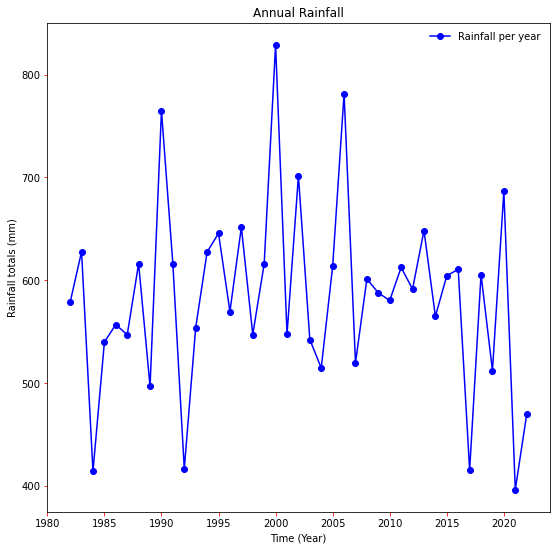

In [5]:
# plot the annual rainfall for location '1_9943'
raindata = df_rain_year['1_9943']

# Create figure and plot space
fig, ax = plt.subplots(figsize=(9, 9))

# Add x-axis and y-axis
ax.plot(raindata.index.values,raindata, color='blue',
        marker='o',label='Rainfall per year')

# Set title and labels for axes
ax.set(xlabel='Time (Year)',
       ylabel='Rainfall totals (mm)',
       title='Annual Rainfall')
ax.legend(loc='upper right', frameon=False)
plt.tick_params(axis='both', labelsize=10, color='red')
plt.show()

#### 3. (25% + 5%) Calculate maximum 1-day rainfall for each month, and export to a CSV file named _Rain_MD-Androy-Bekily_1d-1M-Mean_19810101-20211231_CHIRPS.csv_ 

In [6]:
# Maximum 1-day rainfall for each month
df_rain_1m_group = df_rain_1d.groupby(pd.Grouper(key='date', freq='1M')).max()
df_rain_1m_group.head(5)

,1_9943,1_9944,1_10131,1_10132,1_10133,1_10134,1_10317,1_10318,1_10319,1_10320,...,1_20919,1_20920,1_20921,1_20922,1_20923,1_20924,1_20925,1_20926,1_20927,1_21106
date,,,,,,,,,,,,,,,,,,,,,
1981-01-31,35.127243,34.559639,35.911839,35.347427,34.777458,34.192440,37.361721,36.826237,36.226391,35.668175,...,40.167824,40.237202,40.241169,40.210499,40.213070,40.229290,40.224827,40.205032,40.180874,39.813034
1981-02-28,28.360893,28.462486,28.350855,28.455748,28.555553,28.788784,27.911722,28.271032,28.581778,28.785635,...,34.071617,34.153088,34.222317,34.260010,34.240856,34.221893,34.225090,34.534706,35.023811,33.776985
1981-03-31,10.270131,10.277010,10.125264,10.134870,10.142015,10.168031,9.918592,9.954044,9.990537,10.013745,...,9.802888,9.627991,9.469402,9.358146,9.323527,9.295128,9.269006,9.213860,9.138026,10.247128
1981-04-30,5.176095,5.293668,5.183887,5.220070,5.286818,5.393620,5.920960,5.690397,5.503448,5.429809,...,10.071712,10.141845,10.182705,10.209853,10.230249,10.250067,10.263745,10.304816,10.330404,9.644472
1981-05-31,13.815577,13.799360,12.522117,12.581008,12.569726,12.688835,10.547788,10.766343,10.920316,11.021633,...,15.047010,15.102663,15.196558,15.307686,15.425088,15.544188,15.655846,15.757018,15.847793,14.836603


In [7]:
# Export csv file
fn_data_out = './Data/Rain_MD-Androy-Bekily_1d-1M-Mean_19810101-20211231_CHIRPS.csv'
#df_rain_1m_group.to_csv(fn_data_out, float_format='%.2f') # 小數點至第二位

#### 4. (25% + 5%) Calculate maximum 3 calendar-day rainfall for calendar month November for each year, and export to a CSV file named _Rain_MD-Androy-Bekily_3d-Nov-Max_19810101-20210530_CHIRPS.csv_ 

In [8]:
# 3 calendar-day rainfall
df_rain_3D_sum = df_rain_1d.groupby(pd.Grouper(key='date', freq='3D')).sum()

# reset the index
df_rain_3D_sum = df_rain_3D_sum.reset_index(level=0)
df_rain_3D_sum

,date,1_9943,1_9944,1_10131,1_10132,1_10133,1_10134,1_10317,1_10318,1_10319,...,1_20919,1_20920,1_20921,1_20922,1_20923,1_20924,1_20925,1_20926,1_20927,1_21106
0,1981-01-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.235619,1.250143,1.261638,1.268328,1.272727,1.277125,1.280366,1.284529,1.290669,1.656351
1,1981-01-04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,1981-01-07,28.483840,28.196543,28.939207,28.656284,28.368468,28.159972,29.197316,29.300624,29.291067,...,30.045402,30.542404,30.948935,31.222417,31.402328,31.588010,31.730709,32.003136,32.320444,28.423012
3,1981-01-10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.659582,0.723614,0.789371,0.859376,0.867635,0.882081,0.926042,1.082689,1.326361,0.532842
4,1981-01-13,43.036886,42.341474,44.427364,43.730114,43.026596,42.306026,47.305453,46.635144,45.889711,...,72.570076,72.695414,72.702584,72.647177,72.651822,72.681124,72.673059,72.637297,72.593650,71.929089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4987,2021-12-18,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4988,2021-12-21,1.991874,1.958722,3.121767,3.093238,3.048189,2.994415,4.343554,4.351193,4.347548,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4989,2021-12-24,30.600344,30.182362,30.343969,29.948587,29.515924,29.082394,30.619465,30.413286,30.120138,...,25.834822,25.934289,26.048713,26.079551,26.149138,26.394450,26.982628,27.484875,27.719927,24.812613
4990,2021-12-27,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.555963,0.370590,0.184598,0.008094,0.000000,0.000000,0.000000,0.000000,0.000000,0.988566


In [9]:
# maximum 3 calendar-day rainfall for month
df_rain_1m_max = df_rain_3D_sum.groupby(pd.Grouper(key="date", freq="1M")).max()
# reset the index
df_rain_1m_max = df_rain_1m_max.reset_index(level=0)
df_rain_1m_max

,date,1_9943,1_9944,1_10131,1_10132,1_10133,1_10134,1_10317,1_10318,1_10319,...,1_20919,1_20920,1_20921,1_20922,1_20923,1_20924,1_20925,1_20926,1_20927,1_21106
0,1981-01-31,43.036886,42.341474,44.427364,43.730114,43.026596,42.306026,47.305453,46.635144,45.889711,...,72.570076,72.695414,72.702584,72.647177,72.651822,72.681124,72.673059,72.637297,72.593650,71.929089
1,1981-02-28,41.979739,42.130115,41.690625,41.846311,41.993413,42.337266,40.377998,40.899377,41.356265,...,49.352977,49.470988,49.571270,49.625866,49.598118,49.570651,49.575279,50.023763,50.732232,48.926200
2,1981-03-31,15.922928,15.972673,16.097647,16.143450,16.193555,16.214418,16.402131,16.282496,16.208893,...,22.021857,21.628957,21.272692,21.022759,20.944989,20.881192,20.822510,20.698626,20.528268,23.019828
3,1981-04-30,5.176095,5.293668,5.183887,5.220070,5.286818,5.393620,5.920960,5.690397,5.503448,...,10.071712,10.141845,10.182705,10.209853,10.230249,10.250067,10.263745,10.304816,10.330404,9.644472
4,1981-05-31,16.820093,16.804583,16.537057,16.557862,16.563722,16.558542,15.957524,16.053780,16.154940,...,15.047010,15.102663,15.196558,15.307686,15.425088,15.544188,15.655846,15.757018,15.847793,14.836603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487,2021-08-31,3.671958,3.729111,3.514507,3.573346,3.630097,3.668716,3.350407,3.365895,3.384284,...,4.373363,4.806697,5.136773,5.302296,5.093934,4.673575,4.407234,4.584336,4.765006,4.955395
488,2021-09-30,5.347959,5.921311,4.919859,5.250701,5.732903,6.496152,4.364071,4.469521,4.635553,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
489,2021-10-31,4.610094,4.489393,5.560542,5.508332,5.296517,4.774529,7.635939,6.963819,6.380596,...,6.638910,6.847519,7.098269,7.394137,7.569852,7.761435,7.901713,7.812976,7.647621,5.749119
490,2021-11-30,20.751741,20.463583,21.266823,21.015751,20.760729,20.411716,21.889160,21.759888,21.636833,...,23.855440,24.326841,24.614475,24.893795,25.241589,25.677797,26.588554,27.664131,28.605707,21.085085


In [10]:
df_rain_1m_Nov = df_rain_1m_max[df_rain_1m_max['date'].dt.month == 11]
df_rain_1m_Nov = df_rain_1m_Nov.set_index('date')
df_rain_1m_Nov.head()

,1_9943,1_9944,1_10131,1_10132,1_10133,1_10134,1_10317,1_10318,1_10319,1_10320,...,1_20919,1_20920,1_20921,1_20922,1_20923,1_20924,1_20925,1_20926,1_20927,1_21106
date,,,,,,,,,,,,,,,,,,,,,
1981-11-30,18.793812,18.742560,18.556087,18.509283,18.467310,18.533141,19.825911,19.185894,18.642904,18.356632,...,24.643727,25.210703,25.851583,26.507320,27.184152,27.904529,28.597027,29.332180,30.079474,23.445190
1982-11-30,10.614676,10.172180,11.545610,11.119890,10.694466,10.280648,13.645551,13.095797,12.540902,12.062975,...,7.406639,7.821976,8.186639,8.513294,8.778698,9.061251,9.357274,9.694998,10.037560,6.616588
1983-11-30,20.804812,20.682248,20.995960,20.930283,20.840635,20.716282,21.571786,21.437159,21.293192,21.183446,...,23.198473,24.283770,25.313610,26.237073,27.058180,27.963226,28.882695,29.826449,30.743316,20.884454
1984-11-30,16.225822,16.032200,16.218754,16.033483,15.918919,15.897079,15.602283,15.783138,15.922706,15.910528,...,13.072186,13.462463,13.817293,14.116269,14.130442,13.971523,13.768205,13.546172,13.323588,12.156109
1985-11-30,21.592148,21.384416,21.972694,21.920401,21.669942,21.233082,23.285483,22.790386,22.377764,22.209995,...,44.962896,44.837458,44.602632,44.422544,44.177917,43.803648,43.262375,42.679657,42.138804,44.407770


In [11]:
# Export csv file
fn_data_out = './Data/Rain_MD-Androy-Bekily_3d-Nov-Max_19810101-20210530_CHIRPS.csv'
#df_rain_1m_Nov.to_csv(fn_data_out, float_format='%.2f') # 小數點至第二位

### For your reference, CHIRPS (Climate Hazards Group InfraRed Precipitation with Station data) is a satellite-based precipitation product. It has provided quasi-global rainfall estimate for over 35 years. You can find more information about CHRIPS via this link: https://www.nature.com/articles/sdata201566

### The CSV data file you work with here was clipped over a town called Bekily in the region of Androy Province, Madagascar. Farmers from Bekily are one of the poorest in the world, having no resources to build irrigation system, thus suffering a lot from the drought ( a consequence of climate change, impacting many regions in the world). 